In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
datF = pd.read_csv('/content/gdrive/MyDrive/Powerlifting_project/lifting_data_female.csv', index_col=[0])
datM = pd.read_csv('/content/gdrive/MyDrive/Powerlifting_project/lifting_data_male.csv', index_col=[0])
fullData = pd.read_csv('/content/gdrive/MyDrive/Powerlifting_project/whole_data_set.csv', index_col=[0])

In [ ]:
fullData

,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
0,Carlos Ceron,M,Raw,23.0,87.30,205.0,235.0,125.0
1,Tito Herrera,M,Wraps,23.0,73.48,220.0,260.0,157.5
2,Levi Lehman,M,Raw,26.0,112.40,142.5,220.0,145.0
3,Stacy Hayford,F,Raw,35.0,59.42,95.0,102.5,60.0
4,Brittany Hirt,F,Raw,26.5,61.40,105.0,127.5,60.0
...,...,...,...,...,...,...,...,...
11095,Dimitrios Rallis,M,Wraps,28.0,98.20,270.0,315.0,160.0
11096,Amber Skewes,F,Raw,36.0,58.80,92.5,137.5,57.5
11097,Brandon Mose,M,Raw,22.5,82.62,250.0,311.0,175.0
11098,Missy Lavoie,F,Wraps,28.0,74.30,105.0,152.5,70.0


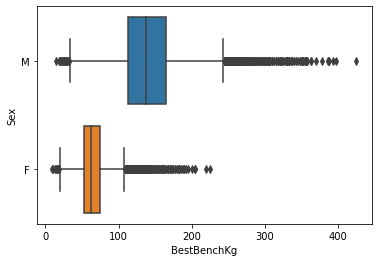

In [ ]:
# Distribution by Sex
sns.boxplot(x='BestBenchKg', y='Sex', data=fullData)

In [ ]:
# Normalizing distribution by Sex
dfM_normal = datM[(datM['BestBenchKg'] < datM['BestBenchKg'].mean() + 3*datM['BestBenchKg'].std()) & 
                  (datM['BestBenchKg'] > datM['BestBenchKg'].mean() - 3*datM['BestBenchKg'].std())]

dfF_normal = datF[(datF['BestBenchKg'] < datF['BestBenchKg'].mean() + 3*datF['BestBenchKg'].std()) & 
                  (datF['BestBenchKg'] > datF['BestBenchKg'].mean() - 3*datF['BestBenchKg'].std())]

df_concat = pd.concat([dfM_normal, dfF_normal])

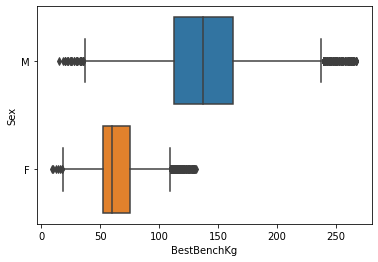

In [ ]:
sns.boxplot(x='BestBenchKg', y='Sex', data=df_concat)

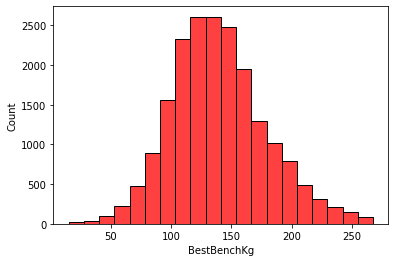

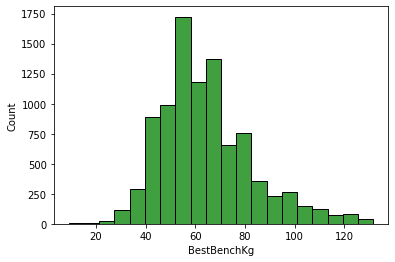

In [ ]:
sns.histplot(dfM_normal['BestBenchKg'], bins=20, color='red')
plt.show()
sns.histplot(dfF_normal['BestBenchKg'], bins=20, color='green')
plt.show()

In [ ]:
# Seeing significant difference in mean weight lifted when/when not using equipment (Male)
for i in dfM_normal['Equipment'].unique():
    if i == 'Raw':
        print('Mean bench (kg) for men when lifting ' + i + ': {:.2f} kg'.format(dfM_normal[ dfM_normal['Equipment'] == i ]['BestBenchKg'].mean()))
    else:
        print('Mean bench (kg) for men when lifting with ' + i + ': {:.2f} kg'.format(dfM_normal[ dfM_normal['Equipment'] == i ]['BestBenchKg'].mean()))

Mean bench (kg) for men when lifting Raw: 131.53 kg
Mean bench (kg) for men when lifting with Wraps: 148.27 kg
Mean bench (kg) for men when lifting with Single-ply: 158.07 kg
Mean bench (kg) for men when lifting with Multi-ply: 184.04 kg


In [ ]:
# Seeing significant difference in mean weight lifted when/when not using equipment (Female)
for i in dfF_normal['Equipment'].unique():
    if i == 'Raw':
        print('Mean bench (kg) for women when lifting ' + i + ': {:.2f} kg'.format(dfF_normal[ dfF_normal['Equipment'] == i ]['BestBenchKg'].mean()))
    else:
        print('Mean bench (kg) for women when lifting with ' + i + ': {:.2f} kg'.format(dfF_normal[ dfF_normal['Equipment'] == i ]['BestBenchKg'].mean()))

Mean bench (kg) for women when lifting Raw: 61.44 kg
Mean bench (kg) for women when lifting with Single-ply: 78.44 kg
Mean bench (kg) for women when lifting with Wraps: 65.97 kg
Mean bench (kg) for women when lifting with Multi-ply: 89.31 kg


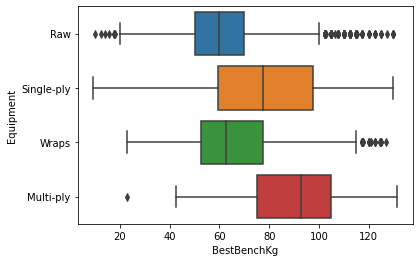

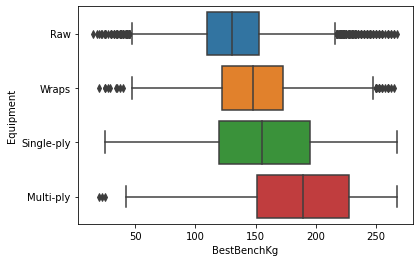

In [ ]:
sns.boxplot(x='BestBenchKg', y='Equipment', data=dfF_normal)
plt.show()
sns.boxplot(x='BestBenchKg', y='Equipment', data=dfM_normal)
plt.show()

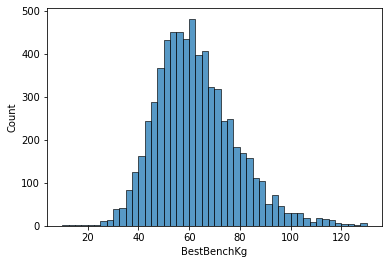

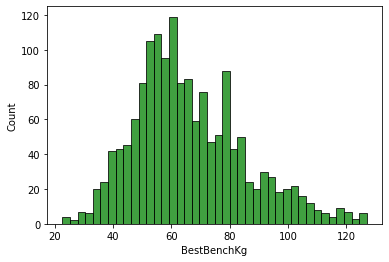

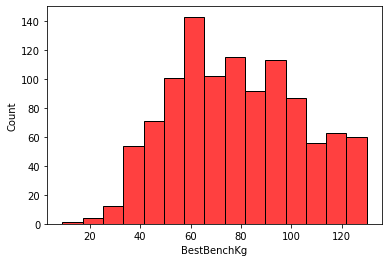

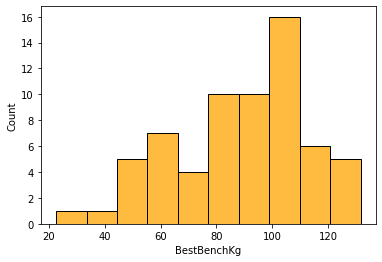

In [ ]:
sns.histplot(dfF_normal[dfF_normal['Equipment'] == 'Raw']['BestBenchKg'], bins=48)
plt.show()
sns.histplot(dfF_normal[dfF_normal['Equipment'] == 'Wraps']['BestBenchKg'], bins=40, color='green')
plt.show()
sns.histplot(dfF_normal[dfF_normal['Equipment'] == 'Single-ply']['BestBenchKg'], bins=15, color='red')
plt.show()
sns.histplot(dfF_normal[dfF_normal['Equipment'] == 'Multi-ply']['BestBenchKg'], bins=10, color='orange')
plt.show()

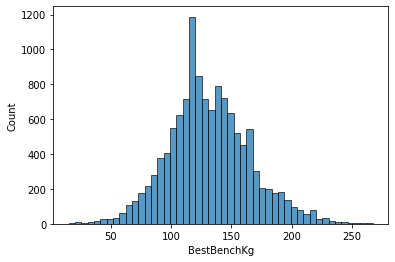

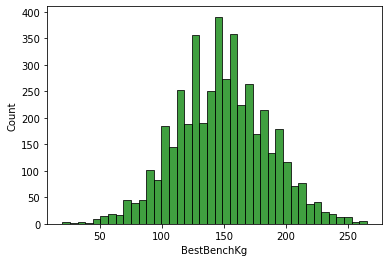

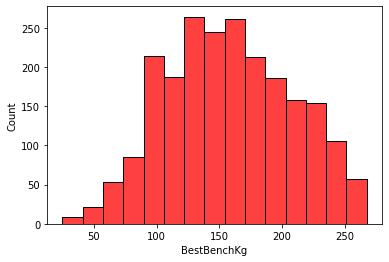

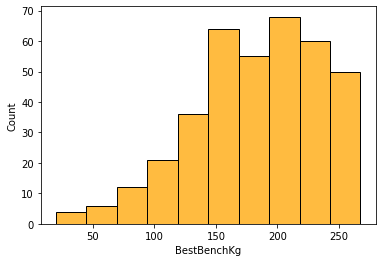

In [ ]:
sns.histplot(dfM_normal[dfM_normal['Equipment'] == 'Raw']['BestBenchKg'], bins=48)
plt.show()
sns.histplot(dfM_normal[dfM_normal['Equipment'] == 'Wraps']['BestBenchKg'], bins=40, color='green')
plt.show()
sns.histplot(dfM_normal[dfM_normal['Equipment'] == 'Single-ply']['BestBenchKg'], bins=15, color='red')
plt.show()
sns.histplot(dfM_normal[dfM_normal['Equipment'] == 'Multi-ply']['BestBenchKg'], bins=10, color='orange')
plt.show()